## MBAX Homework Assignment #1
### Due by the end of Monday, February 19th
Instructions: Make a copy of this document, and add your name to the title.  e.g. the title of your colab should be something like "Scott Gilpin - MBAX 6395 - Homework Assignment #1".  When you are ready to turn in your homework, please share it with me.  Make sure to give me "edit" permission on your colab so that I can see the revision history.  If you make changes after the deadline, your grade will be adjusted accordingly.  Note that the deadline is the end of Monday, February 19th.  If you are in a different time zone, please account for this and turn in your assignment on time!  Let me know if you have any questions.




## Introduction
Your favorite local pizzeria, Papi's Pizzeria, has decided to explore the world of digital advertising.  They are starting with a month long search advertising campaign.  The campaign consists of multiple different ads, each one hoping to achieve a different goal.

There are three different files with data from this search campaign:
* impressions and impression related data
* clicks and click-related data
* conversions and conversion related data.

Each file is a CSV file and will contain a header with column names.  If the same column name shows up in multiple files, you can assume it represents the same thing. Each file has been aggregated by date, hour of day, and device type. The files also include a field for day of week (0=Monday,...,6=Sunday).

The data files can be read using the following code


```
import pandas as pd
impressions_url = 'https://drive.google.com/uc?id=13qUZckRGup5EiDfUzNQXrXiZaX1R4gEz'
impressions = pd.read_csv(impressions_url)

clicks_url = 'https://drive.google.com/uc?id=1KS0tmXc1_iOzvsKI97MV7ZOxAUillRNp'
clicks = pd.read_csv(clicks_url)

conversions_url = 'https://drive.google.com/uc?id=1q73VZzumJ0d5oOBcNuVlZXKgalCMg4VD'
conversions = pd.read_csv(conversions_url)
```



Your job is to answer the following questions and help Papi's Pizzeria decide if search advertising is a good investment for their business.  For each question, write your answer either in the same text box as the question, or in a separate text box directly below it.  If you include code, it's generally easiest to include write your code, then describe any output from your code in a text box below it.

In [ ]:
import pandas as pd
impressions_url = 'https://drive.google.com/uc?id=13qUZckRGup5EiDfUzNQXrXiZaX1R4gEz'
impressions = pd.read_csv(impressions_url)

clicks_url = 'https://drive.google.com/uc?id=1KS0tmXc1_iOzvsKI97MV7ZOxAUillRNp'
clicks = pd.read_csv(clicks_url)

conversions_url = 'https://drive.google.com/uc?id=1q73VZzumJ0d5oOBcNuVlZXKgalCMg4VD'
conversions = pd.read_csv(conversions_url)

In [ ]:
#Exploring Raw data
print(impressions.head())
print(clicks.head())
print(conversions.head())

         date  hour  day_of_week  device  ad_id  total_impressions
0  2023-11-01    11            2  MOBILE   1001                173
1  2023-11-01    11            2  MOBILE   1002                 32
2  2023-11-01    12            2  MOBILE   1001                 65
3  2023-11-01    12            2  MOBILE   1002                125
4  2023-11-01    13            2  MOBILE   1001                167
         date  hour  day_of_week  device  ad_id  total_clicks  \
0  2023-11-01    11            2  MOBILE   1001             3   
1  2023-11-01    12            2  MOBILE   1002             1   
2  2023-11-01    13            2  MOBILE   1001             4   
3  2023-11-01    13            2  MOBILE   1002             8   
4  2023-11-01    14            2  MOBILE   1001             3   

   avg_cost_per_click  
0            2.898340  
1            2.008006  
2            3.760637  
3            2.305475  
4            1.135384  
         date  hour  day_of_week  device  ad_id  total_conversi

## Question #1 (35 pts)
Using the data files provided, summarize the ads, their important attributes, and their important metrics.  You can assume that the date of the first impression for an ad is the "start date", and the date of the last impression for an ad is the "end date".

The easiest way to output this information would be in a table, where the rows are the campaigns, and the columns are campaign attributes / metrics.  Note that implicitly printing a dataframe in pandas (as the last line in a code block) formats it nicer than using the 'print' statement. e.g.


```
import numpy as np
import pandas as pd
df = pd.DataFrame({'campaign id': [1234, 5678],
                   'some info': ['campaign A', 'campaign b'],
                   'metric 1': [100, 500],
                   'metric 2': [9.5, 34]})
df
```


Include all of your code that produces your output.  I should be able to run the code as it is.  If you want to split your code up into multiple blocks, that is perfectly fine (and it might be a good organization strategy!)

In [ ]:

#merging all dataframes
merged_data = pd.merge(impressions,clicks,how='outer', on=['ad_id','date','hour','day_of_week','device'])
merged_data1 = pd.merge(merged_data,conversions,how='outer', on=['ad_id','date','hour','day_of_week','device'])
merged_data1 = merged_data1.fillna(0)
print(merged_data1.head())
print(merged_data1.shape)

         date  hour  day_of_week  device  ad_id  total_impressions  \
0  2023-11-01    11            2  MOBILE   1001                173   
1  2023-11-01    11            2  MOBILE   1002                 32   
2  2023-11-01    12            2  MOBILE   1001                 65   
3  2023-11-01    12            2  MOBILE   1002                125   
4  2023-11-01    13            2  MOBILE   1001                167   

   total_clicks  avg_cost_per_click  total_conversions  total_revenue  
0           3.0            2.898340                0.0            0.0  
1           0.0            0.000000                0.0            0.0  
2           0.0            0.000000                0.0            0.0  
3           1.0            2.008006                0.0            0.0  
4           4.0            3.760637                0.0            0.0  
(572, 10)


In [ ]:
from datetime import datetime

#intialize empty lists
start_date =[]
end_date =[]
num_days=[]

#aggregating merged data
results = merged_data1.groupby('ad_id').agg(
    start_date = ('date','min'),
    end_date = ('date','max'),
    total_impressions = ('total_impressions','sum'),
    total_clicks = ('total_clicks','sum'),
    total_conversions=('total_conversions','sum'),
    total_revenue = ('total_revenue','sum'),
    avg_cost_per_click = ('avg_cost_per_click','mean')
    ).reset_index()

results["Total_costs"] = results["avg_cost_per_click"] * results["total_clicks"]

results["Gross Profit"]= results["total_revenue"] - results["Total_costs"]

for i in results['start_date']:
  start_date.append(datetime.strptime(i, '%Y-%m-%d'))

for i in results['end_date']:
  end_date.append(datetime.strptime(i, '%Y-%m-%d'))

#calculating runtime in days for each ad
for i in range(len(end_date)):
  numdays = end_date[i] - start_date[i]
  num_days.append(numdays.days)

results['Days'] = num_days

#creating per day metrics
results["Imp_per_day"]= results["total_impressions"]/results["Days"]
results["Clicks_per_day"]=results["total_clicks"]/results["Days"]
results["Conv_per_day"]= results["total_conversions"]/results["Days"]
results["Revenue_per_day"]= results["total_revenue"]/results["Days"]


results

,ad_id,start_date,end_date,total_impressions,total_clicks,total_conversions,total_revenue,avg_cost_per_click,Total_costs,Gross Profit,Days,Imp_per_day,Clicks_per_day,Conv_per_day,Revenue_per_day
0,1001,2023-11-01,2023-11-07,11878,306.0,0.0,0.00,1.994420,610.292418,-610.292418,6,1979.666667,51.000000,0.000000,0.000000
1,1002,2023-11-01,2023-11-30,16901,347.0,25.0,1453.50,1.995710,692.511372,760.988628,29,582.793103,11.965517,0.862069,50.120690
2,1003,2023-11-01,2023-11-30,15275,332.0,37.0,1680.83,3.161033,1049.463035,631.366965,29,526.724138,11.448276,1.275862,57.959655
3,1004,2023-11-08,2023-11-30,38207,904.0,84.0,0.00,2.116257,1913.096105,-1913.096105,22,1736.681818,41.090909,3.818182,0.000000


## Question #2 (25 pts)
### What are some key findings from the output of question #1?

**Ad 1001**
*   It had the lowest number of total impressions and total clicks.
*   It had 0 conversions and 0 revenue.
*   It has the highest number of Impressions/day and clicks/day.
*   This ad booked losses due to 0 revenue.
*   Assuming the ad would have generated the same amount of interest day over day,it would have gone on to have more impressions and clicks than any other ad.
*   As suggested above that each ad has a different goal, if the goal for this ad was to reach a wide audience, this would be the most successful ad.


**Ad 1002**
*   It had the second highest number of total impressions and total clicks.
*   It had highest gross profit despite having second highest total revenue.
*   As suggested above that each ad has a different goal, if the goal for this ad was to generate revenue, this would be the most successful ad.


**Ad 1003**
*   It had the highest total revenue.
*   It had the highest average cost per click.
*   It has second highest gross profit.
*   This ad compaign looks the most successful in terms of revenue initially but digging slightly deeper into the cost associated with running the ad, it is not the best option for maximizing profits.

**Ad 1004**
*   It has the highest number of total Impressions and total clicks.
*   It had 0 conversions and 0 revenue.
*   It has largest loss of all the ads.
*   This ad compaign looks the most successful in terms of popularity/wide-reach initially but digging slightly deeper into the cost associated with running the ad and per day normalization, it is not the best option for brand recognition.



## Question #3 (10 pts)
### Pick one ad to do a deeper analysis on.  Why did you choose this ad?

I choose ad 1002 because it produced the highest gross profit so there are good things to be learnt from this ad and used in future campaigns.

In [ ]:
# Digging deeper into ad 1002
# Grouping by day of the week

results_1002 = merged_data1.where(merged_data1['ad_id']==1002).groupby(['day_of_week']).agg(
    total_impressions = ('total_impressions','sum'),
    total_clicks = ('total_clicks','sum'),
    total_conversions=('total_conversions','sum'),
    total_revenue = ('total_revenue','sum'),
    avg_cost_per_click = ('avg_cost_per_click','mean')).reset_index()

results_1002["Total_costs"] = results_1002["avg_cost_per_click"] * results_1002["total_clicks"]

results_1002["CTR"] = results_1002["total_clicks"]/results_1002["total_impressions"]
results_1002["CPC"] = results_1002["Total_costs"]/results_1002["total_clicks"]
results_1002["CVR"] = results_1002["total_conversions"]/results_1002["total_clicks"]
results_1002["CPA"] = results_1002["Total_costs"]/results_1002["total_conversions"]
results_1002["ROAS"] = results_1002["total_revenue"]/results_1002["Total_costs"]

results_1002

,day_of_week,total_impressions,total_clicks,total_conversions,total_revenue,avg_cost_per_click,Total_costs,CTR,CPC,CVR,CPA,ROAS
0,0.0,1590.0,31.0,1.0,19.98,1.742535,54.018598,0.019497,1.742535,0.032258,54.018598,0.369873
1,1.0,1741.0,41.0,5.0,182.36,1.714267,70.284930,0.023550,1.714267,0.121951,14.056986,2.594582
2,2.0,2677.0,58.0,5.0,127.65,1.685975,97.786577,0.021666,1.685975,0.086207,19.557315,1.305394
3,3.0,3317.0,68.0,8.0,875.23,2.097545,142.633079,0.020500,2.097545,0.117647,17.829135,6.136234
4,4.0,2747.0,52.0,2.0,63.48,2.539318,132.044532,0.018930,2.539318,0.038462,66.022266,0.480747
5,5.0,3053.0,63.0,3.0,153.71,2.478636,156.154064,0.020635,2.478636,0.047619,52.051355,0.984348
6,6.0,1776.0,34.0,1.0,31.09,1.763668,59.964721,0.019144,1.763668,0.029412,59.964721,0.518472


In [ ]:
# Digging deeper into ad 1002
# Grouping by day of the week

results_1002_hour = merged_data1.where(merged_data1['ad_id']==1002).groupby(['day_of_week','hour']).agg(
    total_impressions = ('total_impressions','sum'),
    total_clicks = ('total_clicks','sum'),
    total_conversions=('total_conversions','sum'),
    total_revenue = ('total_revenue','sum'),
    avg_cost_per_click = ('avg_cost_per_click','mean')).reset_index()

results_1002_hour["Total_costs"] = results_1002_hour["avg_cost_per_click"] * results_1002_hour["total_clicks"]

results_1002_hour["CTR"] = results_1002_hour["total_clicks"]/results_1002_hour["total_impressions"]
results_1002_hour["CPC"] = results_1002_hour["Total_costs"]/results_1002_hour["total_clicks"]
results_1002_hour["CVR"] = results_1002_hour["total_conversions"]/results_1002_hour["total_clicks"]
results_1002_hour["CPA"] = results_1002_hour["Total_costs"]/results_1002_hour["total_conversions"]
results_1002_hour["ROAS"] = results_1002_hour["total_revenue"]/results_1002_hour["Total_costs"]

results_1002_hour

,day_of_week,hour,total_impressions,total_clicks,total_conversions,total_revenue,avg_cost_per_click,Total_costs,CTR,CPC,CVR,CPA,ROAS
0,0.0,11.0,348.0,10.0,0.0,0.00,2.012622,20.126216,0.028736,2.012622,0.000000,inf,0.000000
1,0.0,12.0,411.0,10.0,0.0,0.00,1.635168,16.351678,0.024331,1.635168,0.000000,inf,0.000000
2,0.0,13.0,386.0,6.0,0.0,0.00,2.735734,16.414403,0.015544,2.735734,0.000000,inf,0.000000
3,0.0,14.0,445.0,5.0,1.0,19.98,0.586618,2.933091,0.011236,0.586618,0.200000,2.933091,6.811926
4,1.0,11.0,402.0,5.0,0.0,0.00,1.605414,8.027072,0.012438,1.605414,0.000000,inf,0.000000
5,1.0,12.0,607.0,15.0,2.0,81.15,1.629914,24.448703,0.024712,1.629914,0.133333,12.224352,3.319194
6,1.0,13.0,459.0,14.0,2.0,67.49,2.306069,32.284971,0.030501,2.306069,0.142857,16.142485,2.090446
7,1.0,14.0,273.0,7.0,1.0,33.72,1.315669,9.209683,0.025641,1.315669,0.142857,9.209683,3.661364
8,2.0,11.0,565.0,11.0,1.0,16.05,1.670165,18.371817,0.019469,1.670165,0.090909,18.371817,0.873621
9,2.0,12.0,804.0,12.0,2.0,69.25,1.378880,16.546557,0.014925,1.378880,0.166667,8.273279,4.185161


### Write your analysis for question #3 here

This ad was run every day of the week from 11 A.M to 3 P.M.
The best performing days with highest ROAS were Thursdays and Tuesdays.

After breaking down each day into hours, we are able to see that the 11 A.M- 12 P.M hour on Thursdays is the busiest and the most profitable hour in the whole week.
the 12 P.M - 3P.M window on Tuesdays is consistently high ROAS.

Mondays from 11 A.M to 2 P.M and Sundays between 12 P.M to 3 P.M , there is no conversion and no revenue generated. It might be recommndable to consider bolstering other hours to save sunk cost in these time slots.






## Question #4 (30 pts)
### What is your analysis of the overall effectiveness of this search campaign, and should Papi's Pizzeria invest in more search campaigns going forward? Please include any code to support your conclusions.

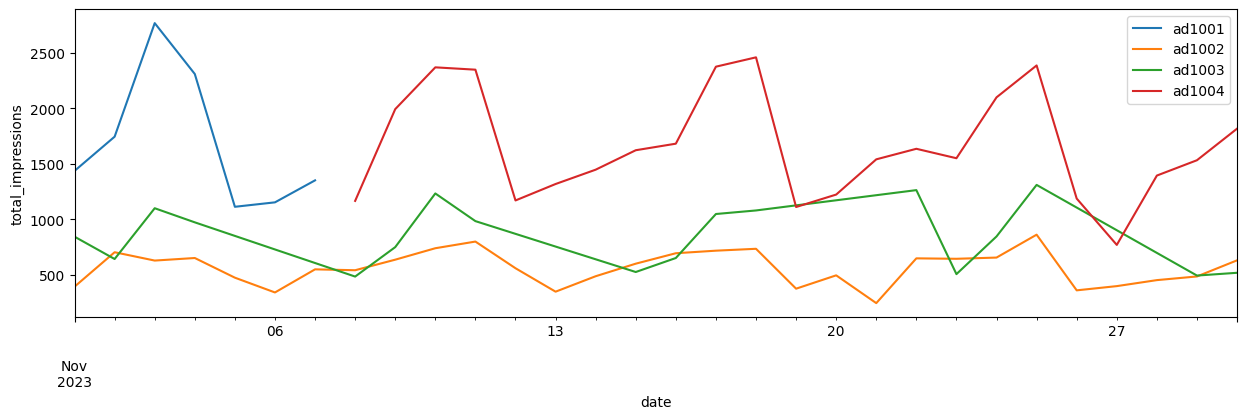

In [ ]:
# Insert code for question #4 here
import matplotlib.pyplot as plt

clicks['date'] = pd.to_datetime(clicks['date'], format='%Y-%m-%d')
conversions['date'] = pd.to_datetime(conversions['date'], format='%Y-%m-%d')
impressions['date'] = pd.to_datetime(impressions['date'], format='%Y-%m-%d')
merged_data1['date'] = pd.to_datetime(merged_data1['date'], format='%Y-%m-%d')

clicks['date'] = pd.to_datetime(clicks['date'], format='%d-%m-%Y')
conversions['date'] = pd.to_datetime(conversions['date'], format='%d-%m-%Y')
impressions['date'] = pd.to_datetime(impressions['date'], format='%d-%m-%Y')

merged_data1['date'] = pd.to_datetime(merged_data1['date'], format='%d-%m-%Y')

col = "total_impressions"
plt.figure(figsize=(15,4))

ad1001 = merged_data1.where(merged_data1["ad_id"]==1001).groupby("date")[col].sum()
ad1001.plot(label = "ad1001")
ad1002 = merged_data1.where(merged_data1["ad_id"]==1002).groupby("date")[col].sum()
ad1002.plot(label = "ad1002")
ad1003 = merged_data1.where(merged_data1["ad_id"]==1003).groupby("date")[col].sum()
ad1003.plot(label = "ad1003")
ad1004 = merged_data1.where(merged_data1["ad_id"]==1004).groupby("date")[col].sum()
ad1004.plot(label = "ad1004")
plt.legend()
plt.ylabel(col)
# Display the plot
plt.show()

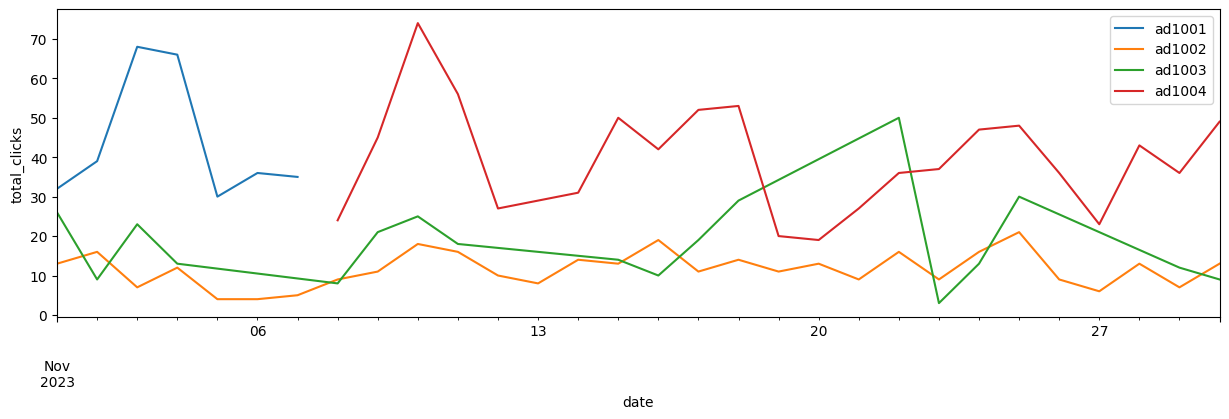

In [ ]:
col = "total_clicks"
plt.figure(figsize=(15,4))
ad1001 = merged_data1.where(merged_data1["ad_id"]==1001).groupby("date")[col].sum()
ad1001.plot(label = "ad1001")
ad1002 = merged_data1.where(merged_data1["ad_id"]==1002).groupby("date")[col].sum()
ad1002.plot(label = "ad1002")
ad1003 = merged_data1.where(merged_data1["ad_id"]==1003).groupby("date")[col].sum()
ad1003.plot(label = "ad1003")
ad1004 = merged_data1.where(merged_data1["ad_id"]==1004).groupby("date")[col].sum()
ad1004.plot(label = "ad1004")
plt.legend()
plt.ylabel(col)
# Display the plot
plt.show()

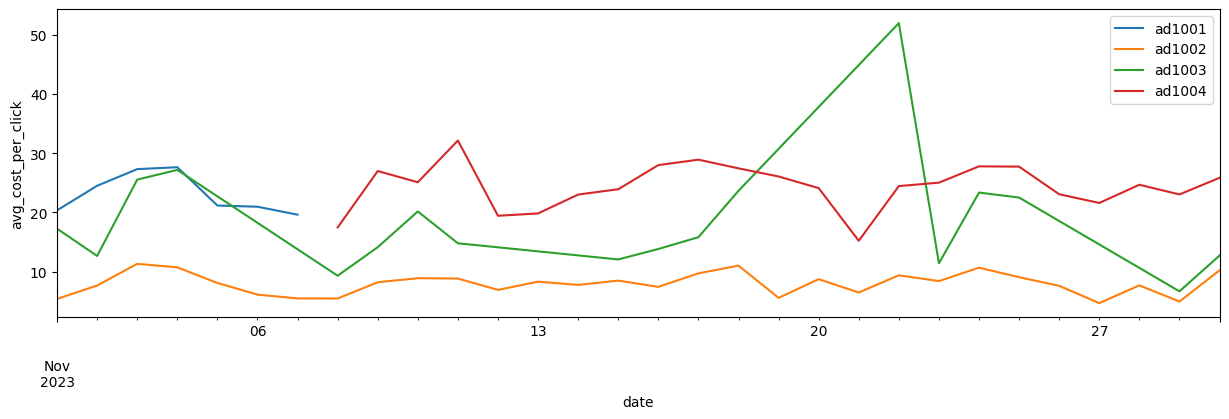

In [ ]:
col = "avg_cost_per_click"
plt.figure(figsize=(15,4))
ad1001 = merged_data1.where(merged_data1["ad_id"]==1001).groupby("date")[col].sum()
ad1001.plot(label = "ad1001")
ad1002 = merged_data1.where(merged_data1["ad_id"]==1002).groupby("date")[col].sum()
ad1002.plot(label = "ad1002")
ad1003 = merged_data1.where(merged_data1["ad_id"]==1003).groupby("date")[col].sum()
ad1003.plot(label = "ad1003")
ad1004 = merged_data1.where(merged_data1["ad_id"]==1004).groupby("date")[col].sum()
ad1004.plot(label = "ad1004")
plt.legend()
plt.ylabel(col)
# Display the plot
plt.show()

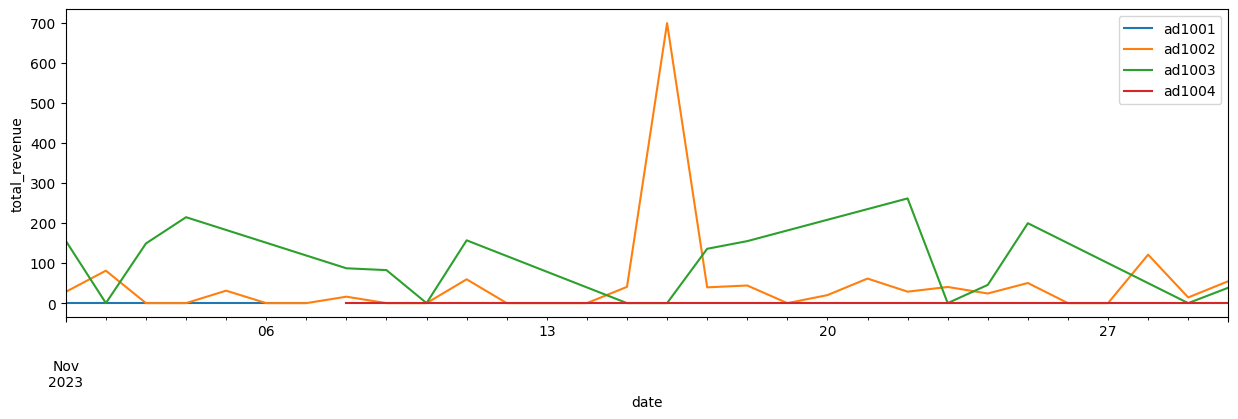

In [ ]:
col = "total_revenue"
plt.figure(figsize=(15,4))
ad1001 = merged_data1.where(merged_data1["ad_id"]==1001).groupby("date")[col].sum()
ad1001.plot(label = "ad1001")
ad1002 = merged_data1.where(merged_data1["ad_id"]==1002).groupby("date")[col].sum()
ad1002.plot(label = "ad1002")
ad1003 = merged_data1.where(merged_data1["ad_id"]==1003).groupby("date")[col].sum()
ad1003.plot(label = "ad1003")
ad1004 = merged_data1.where(merged_data1["ad_id"]==1004).groupby("date")[col].sum()
ad1004.plot(label = "ad1004")
plt.legend()
plt.ylabel(col)
# Display the plot
plt.show()

Write your analysis for question #4 here


The overall analysis summary of the search campaigns is as follows:

*  All 4 campaigns used showed different strengths towards different end goals.
*  Based on graphical representations of time series trends, revenue focused ad campaigns (1002 and 1003) were able to return positive Return on Ad Spend
*  Based on data, the popularity focused ad campaigns (1001 and 1004), showed a higher interest from ad viewers on a consistent basis during the length of the campaign.
*

I would like to recommend continued investment in ad campaigns for Papi's Pizzeria due to the following reasons:

*  We saw a consistent behavior of increased user interest when ad focus was popularity and reaching a wide audience. This can directly help Papi's business and allow them to grow their reach and target customers attracting untapped demographics.
*  We saw an increase in conversions and revenue when ad focus was on enticing customers to place online orders. This can directly help Papi's online order revenue generation and help increase business without explanding investment costs of infrastructure.
*  As demonstrated, the cost of running these ad campaigns is mitigated significantly by the increased revenue they bring in.
*  Of the 4 ad campaigns presented in the data above, i would recommend pursuing ad1003.
*  While the gross profit collected in ad1002 was more than all others, ad1003 was consistently bringing profits with room to grow.
* An Ideal ad campaign would be the mix of ad1001 and ad1003 that would give us the best of both worlds.
